In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [5]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [6]:
from textblob import TextBlob, Word
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from bidi.algorithm import get_display


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import nltk
from sklearn import datasets
from PIL import Image

authors_data =pd.read_csv(r'C:\Users\user\Desktop\EDA PROJECT\authors.csv')
papers_data =pd.read_csv(r'C:\Users\user\Desktop\EDA PROJECT\papers.csv')




In [8]:
authors_data.info

<bound method DataFrame.info of        source_id first_name    last_name                     institution
0             27       Alan       Murray                             NaN
1             27    Anthony        Smith                             NaN
2             27        Zoe       Butler                             NaN
3             63      Yaser  Abu-Mostafa                             NaN
4             60    Michael     Fleisher                             NaN
...          ...        ...          ...                             ...
30232       8693     Joshua         Wang                          Google
30233       2302       Ruho        Kondo  Toyota Central R&D Labs., Inc.
30234       2302    Keisuke       Kawano   Toyota Central R&D Labs., Inc
30235       2302    Satoshi        Koide        Toyota Central R&D Labs.
30236       2302     Takuro      Kutsuna   Toyota Central R&D Labs. Inc.

[30237 rows x 4 columns]>

In [9]:
papers_data.info

<bound method DataFrame.info of       source_id  year                                              title  \
0            27  1987                         Bit-Serial Neural Networks   
1            63  1987                        Connectivity Versus Entropy   
2            60  1987        The Hopfield Model with Multi-Level Neurons   
3            59  1987                               How Neural Nets Work   
4            69  1987  Spatial Organization of Neural Networks: A Pro...   
...         ...   ...                                                ...   
9675       5452  2019  Discrete Object Generation with Reversible Ind...   
9676       4799  2019  Adaptively Aligned Image Captioning via Adapti...   
9677       1827  2019         Fully Dynamic Consistent Facility Location   
9678       8693  2019      Efficient Rematerialization for Deep Networks   
9679       2302  2019  Flow-based Image-to-Image Translation with Fea...   

                                               abstract

In [10]:
authors_data

,source_id,first_name,last_name,institution
0,27,Alan,Murray,NaN
1,27,Anthony,Smith,NaN
2,27,Zoe,Butler,NaN
3,63,Yaser,Abu-Mostafa,NaN
4,60,Michael,Fleisher,NaN
...,...,...,...,...
30232,8693,Joshua,Wang,Google
30233,2302,Ruho,Kondo,"Toyota Central R&D Labs., Inc."
30234,2302,Keisuke,Kawano,"Toyota Central R&D Labs., Inc"
30235,2302,Satoshi,Koide,Toyota Central R&D Labs.


In [11]:
papers_data

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...
...,...,...,...,...,...
9675,5452,2019,Discrete Object Generation with Reversible Ind...,The success of generative modeling in continuo...,Discrete Object Generation\n\nwith Reversible ...
9676,4799,2019,Adaptively Aligned Image Captioning via Adapti...,Recent neural models for image captioning usua...,Adaptively Aligned Image Captioning via\n\nAda...
9677,1827,2019,Fully Dynamic Consistent Facility Location,We consider classic clustering problems in ful...,Fully Dynamic Consistent Facility Location\n\n...
9678,8693,2019,Efficient Rematerialization for Deep Networks,"When training complex neural networks, memory ...",Efﬁcient Rematerialization for Deep Networks\n...


In [12]:
authors_data.describe()

,source_id
count,30237.000000
mean,2135.749942
std,1952.749005
min,1.000000
25%,759.000000
50%,1526.000000
75%,2798.000000
max,9406.000000


In [13]:
papers_data.describe()

,source_id,year
count,9680.000000,9680.000000
mean,1963.827479,2009.498760
std,1825.720545,9.233312
min,1.000000,1987.000000
25%,717.000000,2003.000000
50%,1403.000000,2013.000000
75%,2579.000000,2018.000000
max,9406.000000,2019.000000


In [14]:
authors_data.dtypes


source_id       int64
first_name     object
last_name      object
institution    object
dtype: object

In [15]:
papers_data.dtypes


source_id     int64
year          int64
title        object
abstract     object
full_text    object
dtype: object

In [16]:
authors_data.isna().sum()


source_id          0
first_name         1
last_name          3
institution    12934
dtype: int64

In [17]:
papers_data.isna().sum()

source_id       0
year            0
title           0
abstract     3319
full_text       3
dtype: int64

In [18]:
# replacing na values
authors_data["institution"].fillna("No institution", inplace = True)
authors_data["first_name"].fillna("some one", inplace = True)
authors_data["last_name"].fillna("some one", inplace = True)

In [19]:
authors_data.isna().sum()


source_id      0
first_name     0
last_name      0
institution    0
dtype: int64

In [20]:
authors_data


,source_id,first_name,last_name,institution
0,27,Alan,Murray,No institution
1,27,Anthony,Smith,No institution
2,27,Zoe,Butler,No institution
3,63,Yaser,Abu-Mostafa,No institution
4,60,Michael,Fleisher,No institution
...,...,...,...,...
30232,8693,Joshua,Wang,Google
30233,2302,Ruho,Kondo,"Toyota Central R&D Labs., Inc."
30234,2302,Keisuke,Kawano,"Toyota Central R&D Labs., Inc"
30235,2302,Satoshi,Koide,Toyota Central R&D Labs.


In [21]:
# replacing na values 
papers_data['full_text'].fillna("no full_text ", inplace = True)
papers_data['abstract'].fillna("no abstract ", inplace = True)


In [22]:
papers_data.isna().sum()

source_id    0
year         0
title        0
abstract     0
full_text    0
dtype: int64

In [23]:
boolean =  papers_data["title"].is_unique      # True (credit to @Carsten)
boolean

True

In [24]:
#Non useful text removal:
papers_data['full_text'] = papers_data['full_text'].apply(lambda t: re.sub('@[^ ]+|#[^ ]+|\n', '', t))
papers_data['abstract'] = papers_data['abstract'].apply(lambda t: re.sub('@[^ ]+|#[^ ]+|\n', '', t))
papers_data['title'] = papers_data['title'].apply(lambda t: re.sub('@[^ ]+|#[^ ]+|\n', '', t))
papers_data

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,no abstract,573 BIT - SERIAL NEURAL NETWORKS Alan F. Mur...
1,63,1987,Connectivity Versus Entropy,no abstract,1 CONNECTIVITY VERSUS ENTROPY Yaser S. Abu-M...
2,60,1987,The Hopfield Model with Multi-Level Neurons,no abstract,278 THE HOPFIELD MODEL WITH MUL TI-LEVEL NEURO...
3,59,1987,How Neural Nets Work,no abstract,442 Alan Lapedes Robert Farber Theoretical D...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,no abstract,740 SPATIAL ORGANIZATION OF NEURAL NEn~ORK...
...,...,...,...,...,...
9675,5452,2019,Discrete Object Generation with Reversible Ind...,The success of generative modeling in continuo...,Discrete Object Generationwith Reversible Indu...
9676,4799,2019,Adaptively Aligned Image Captioning via Adapti...,Recent neural models for image captioning usua...,Adaptively Aligned Image Captioning viaAdaptiv...
9677,1827,2019,Fully Dynamic Consistent Facility Location,We consider classic clustering problems in ful...,Fully Dynamic Consistent Facility LocationVinc...
9678,8693,2019,Efficient Rematerialization for Deep Networks,"When training complex neural networks, memory ...",Efﬁcient Rematerialization for Deep NetworksRa...


In [25]:
papers_data.sample(10)

,source_id,year,title,abstract,full_text
5720,1059,2015,On the Accuracy of Self-Normalized Log-Linear ...,Calculation of the log-normalizer is a major c...,On the Accuracy of Self-NormalizedLog-Linear M...
5655,503,2015,A Framework for Individualizing Predictions of...,"For many complex diseases, there is a wide var...",A Framework for Individualizing Predictions of...
9237,1444,2019,Learning Transferable Graph Exploration,This paper considers the problem of efficient ...,Learning Transferable Graph ExplorationHanjun ...
5156,767,2013,Firing rate predictions in optimal balanced ne...,How are firing rates in a spiking network rela...,Firing rate predictions in optimal balanced ne...
4561,1223,2012,Non-linear Metric Learning,"In this paper, we introduce two novel metric l...","Non-linear Metric LearningDor Kedem, Stephen T..."
1896,1818,2000,The Unscented Particle Filter,no abstract,The Unscented Particle Filter Rudolph van de...
7323,1891,2018,Bayesian Inference of Temporal Task Specificat...,"When observing task demonstrations, human appr...",Bayesian Inference of Temporal Task Speciﬁcati...
1318,1332,1997,Mapping a Manifold of Perceptual Observations,no abstract,Mapping a manifold of perceptual observations ...
1465,1539,1998,Fisher Scoring and a Mixture of Modes Approach...,no abstract,Fisher Scoring and a Mixture of Modes Approach...
7782,1478,2018,Empirical Risk Minimization Under Fairness Con...,We address the problem of algorithmic fairness...,Empirical Risk MinimizationUnder Fairness Cons...


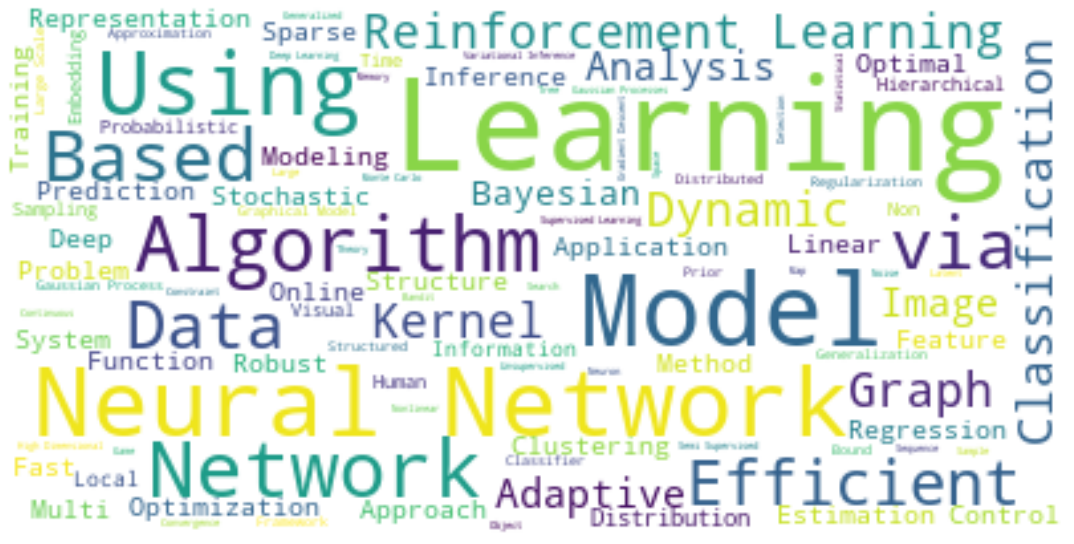

In [26]:
stop = stopwords.words('english')
my_stop_words = stop + ['im']
papers_data['title'] = papers_data['title'].apply(lambda t: " ".join(word for word in t.split() if word not in my_stop_words))
title_list =papers_data['title'].tolist()
str1 = '  '.join(str(e) for e in  title_list)

# Start with one review:
text = str1

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=[19,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [27]:
#Q1 \ find all paper write in 2019 ?
paper_title_2019= papers_data.loc[papers_data['year'] == 2019]
paper_title_2019

,source_id,year,title,abstract,full_text
8252,8547,2019,Compositional Plan Vectors,Autonomous agents situated in real-world envir...,Plan Arithmetic: Compositional Plan Vectors fo...
8253,610,2019,Learning Propagate Graph Meta-Learning,Meta-learning extracts the common knowledge fr...,Learning to Propagate for Graph Meta-LearningL...
8254,1164,2019,XNAS: Neural Architecture Search Expert Advice,This paper introduces a novel optimization met...,XNAS: Neural Architecture Searchwith Expert Ad...
8255,7845,2019,Multi-resolution Multi-task Gaussian Processes,We consider evidence integration from potentia...,Multi-resolution Multi-task Gaussian Processes...
8256,348,2019,Deep Equilibrium Models,We present a new approach to modeling sequenti...,Deep Equilibrium ModelsShaojie BaiJ. Zico Kolt...
...,...,...,...,...,...
9675,5452,2019,Discrete Object Generation Reversible Inductiv...,The success of generative modeling in continuo...,Discrete Object Generationwith Reversible Indu...
9676,4799,2019,Adaptively Aligned Image Captioning via Adapti...,Recent neural models for image captioning usua...,Adaptively Aligned Image Captioning viaAdaptiv...
9677,1827,2019,Fully Dynamic Consistent Facility Location,We consider classic clustering problems in ful...,Fully Dynamic Consistent Facility LocationVinc...
9678,8693,2019,Efficient Rematerialization Deep Networks,"When training complex neural networks, memory ...",Efﬁcient Rematerialization for Deep NetworksRa...


In [28]:
paper_title_2019.sample(10)

,source_id,year,title,abstract,full_text
8607,4549,2019,Robust Communication-Efficient Collaborative L...,"We consider a decentralized learning problem, ...",Robust and Communication-EfﬁcientCollaborative...
9152,1308,2019,Online Stochastic Shortest Path Bandit Feedbac...,We consider online learning in episodic l...,Online Stochastic Shortest Path withBandit Fee...
9240,7280,2019,A Fourier Perspective Model Robustness Compute...,Achieving robustness to distributional shift i...,A Fourier Perspective on Model Robustness inCo...
9228,7849,2019,Provable Certificates Adversarial Examples: Fi...,We propose a novel method for computing exact ...,Provable Certiﬁcates for Adversarial Examples:...
8451,2811,2019,ANODEV2: A Coupled Neural ODE Framework,It has been observed that residual networks ca...,ANODEV2: A Coupled Neural ODE FrameworkTianjun...
8754,1710,2019,Multi-mapping Image-to-Image Translation via L...,Recent advances of image-to-image translation ...,Multi-mapping Image-to-Image Translation viaLe...
8300,9262,2019,The Geometry Deep Networks: Power Diagram Subd...,We study the geometry of deep (neural) network...,The Geometry of Deep Networks:Power Diagram Su...
9316,8016,2019,Stochastic Frank-Wolfe Composite Convex Minimi...,A broad class of convex optimization problems ...,Stochastic Frank-Wolfe forComposite Convex Min...
8345,4472,2019,Hyperbolic Graph Neural Networks,Learning from graph-structured data is an impo...,"Hyperbolic Graph Neural NetworksQi Liu∗, Maxim..."
8606,4848,2019,Defending Against Neural Fake News,Recent progress in natural language generation...,Defending Against Neural Fake NewsRowan Zeller...


In [29]:
# Q2 \ find the most famous authors

n = 10
most_famous_authors= authors_data['first_name'].value_counts()[:n].index.tolist()
print('The most famous author Write about NIPS is :',most_famous_authors)

The most famous author Write about NIPS is : ['David', 'Michael', 'John', 'Daniel', 'Peter', 'Andrew', 'Thomas', 'Richard', 'James', 'Robert']


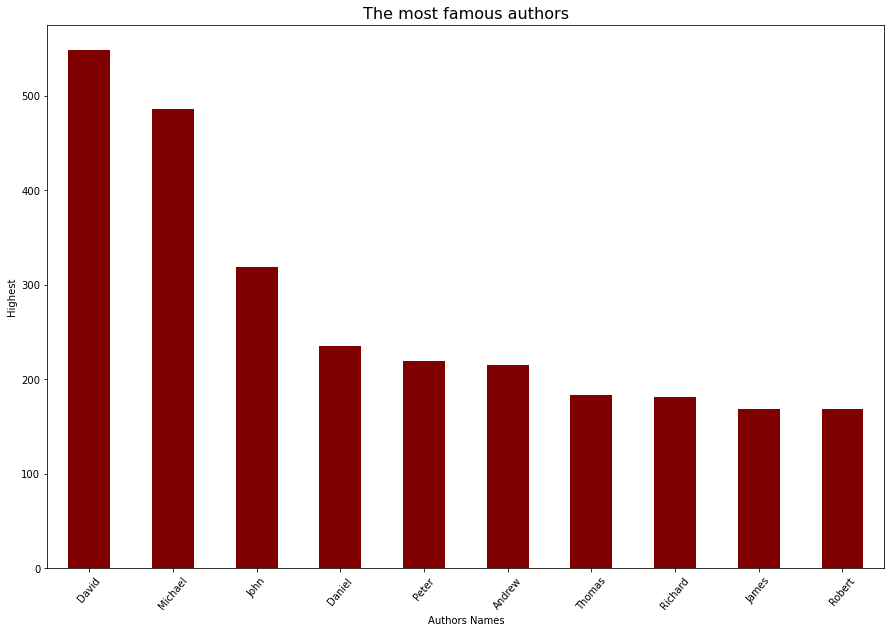

In [30]:

plt.figure(figsize=(15,10))
authors_data['first_name'].value_counts()[:n].plot.bar(color ='maroon')
plt.xticks(rotation=50)
plt.xlabel("Authors Names")
plt.ylabel("Highest")
plt.title('The most famous authors', fontsize=16)
plt.show()


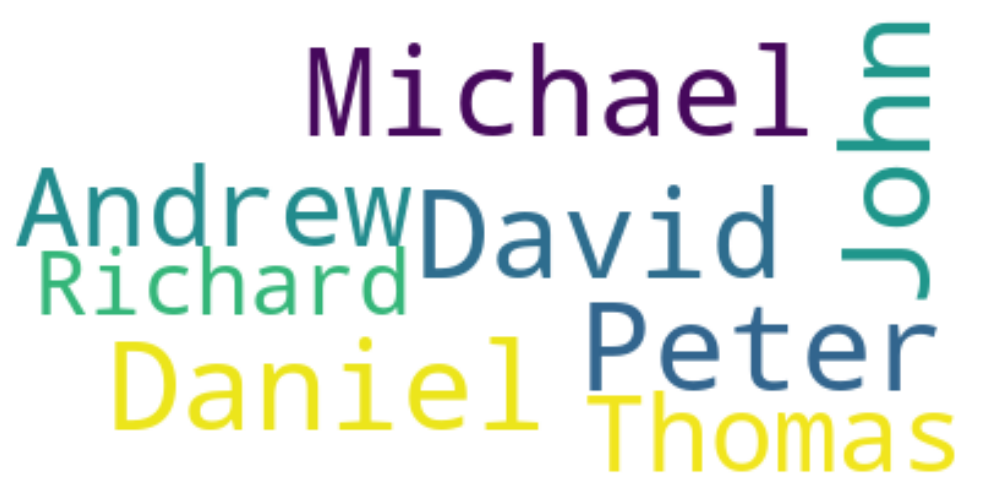

In [31]:
#Generating WordClouds in Python
n = 8
most_famous_authors= authors_data['first_name'].value_counts()[:n].index.tolist()
str1 = '  '.join(str(e) for e in most_famous_authors)

# Start with one review:
text = str1

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=[18,9])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:title={'center':' and Papers every Years '}>

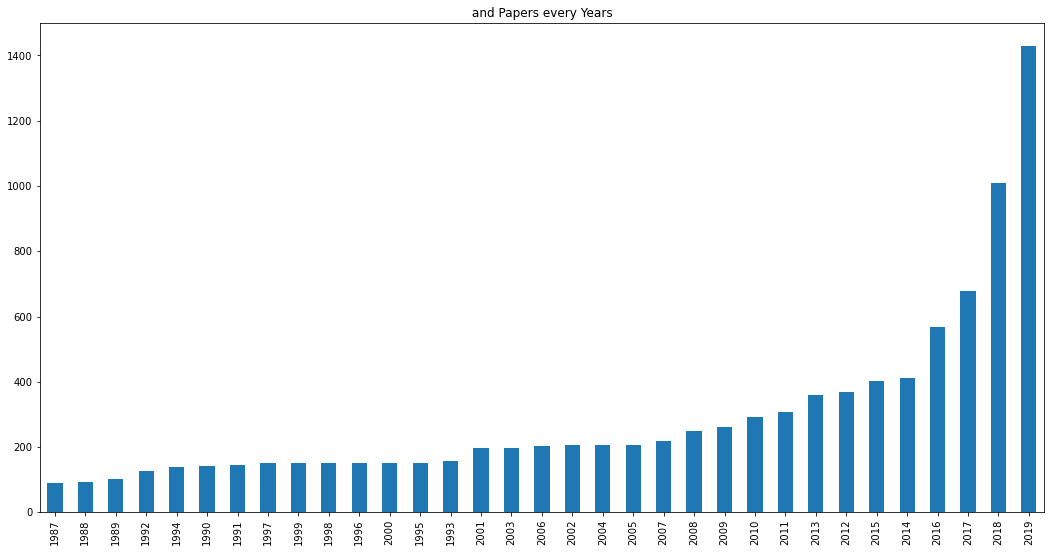

In [32]:
plt.figure(figsize=[18,9])
plt.title (" and Papers every Years ")
papers_data['year'].value_counts(ascending=True).plot(kind='bar')

In [33]:
#Q4/ filtering the rows where paper abstract is about computer vision
paper_title_CV = papers_data[papers_data['abstract'].str.contains('computer vision')]
paper_title_CV

,source_id,year,title,abstract,full_text
3186,874,2007,The discriminant center-surround hypothesis bo...,"The classical hypothesis, that bottom-up salie...",The discriminant center-surround hypothesis fo...
3326,102,2007,Spatial Latent Dirichlet Allocation,"In recent years, the language model Latent Dir...",Spatial Latent Dirichlet AllocationXiaogang Wa...
3345,833,2008,Grouping Contours Via Related Image,Contours have been established in the biologic...,Grouping Contours Via a Related ImagePraveen S...
3351,60,2008,Cascaded Classification Models: Combining Mode...,One of the original goals of computer vision w...,Cascaded Classiﬁcation Models:Combining Models...
3437,431,2008,Offline Handwriting Recognition Multidimension...,Offline handwriting recognition---the transcri...,Ofﬂine Handwriting Recognition withMultidimens...
...,...,...,...,...,...
9474,5717,2019,Unsupervised Learning Object Keypoints Percept...,The study of object representations in compute...,Unsupervised Learning of Object Keypointsfor P...
9562,4676,2019,Graph Structured Prediction Energy Networks,"For joint inference over multiple variables, a...",Graph Structured Prediction Energy NetworksCol...
9605,8988,2019,Neural Taskonomy: Inferring Similarity Task-De...,Convolutional neural networks (CNNs) trained f...,Neural Taskonomy: Inferring the Similarity ofT...
9622,8790,2019,Certifying Geometric Robustness Neural Networks,The use of neural networks in safety-critical ...,Certifying Geometric Robustness of Neural Netw...


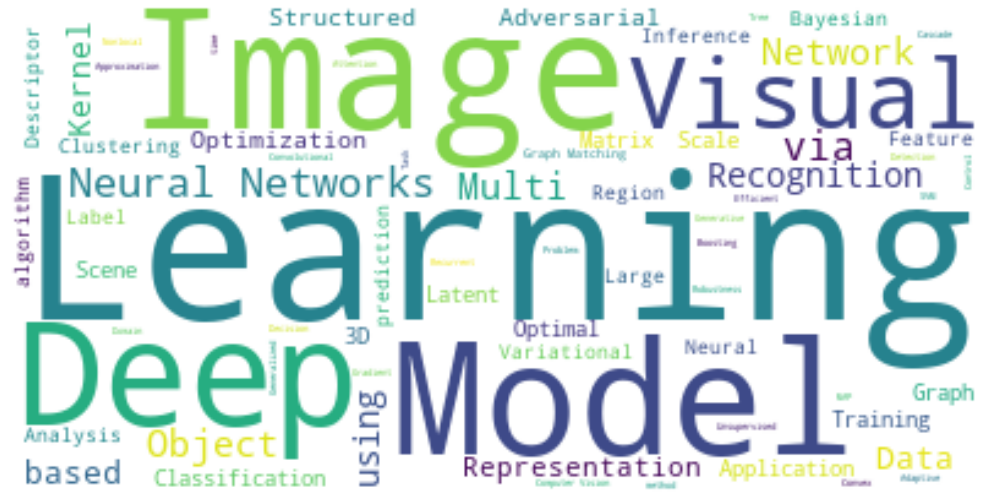

In [34]:
#Drow computer vision wordcloud
tolist=paper_title_CV.title.tolist()
#type(df)
str1 = '  '.join(str(e) for e in tolist)

# Start with one review:
text = str1

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=1000, max_words=600, background_color="white").generate(text)
plt.figure(figsize=[18,9])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
paper_title_ML=papers_data[papers_data['abstract'].str.contains(' machine learning')]
paper_title_ML

,source_id,year,title,abstract,full_text
3228,197,2007,Stability Bounds Non-i.i.d. Processes,The notion of algorithmic stability has been u...,Stability Bounds for Non-i.i.d. ProcessesMehry...
3235,747,2007,A General Boosting Method Application Learning...,We present a general boosting method extending...,A General Boosting Method and its Application ...
3261,637,2007,Mining Internet-Scale Software Repositories,Large repositories of source code create new c...,Mining Internet-Scale Software RepositoriesEri...
3347,841,2008,Analyzing human feature learning nonparametric...,Almost all successful machine learning algorit...,Analyzing human feature learning asnonparametr...
3350,762,2008,Asynchronous Distributed Learning Topic Models,Distributed learning is a problem of fundament...,Asynchronous Distributed Learning of Topic Mod...
...,...,...,...,...,...
9648,1204,2019,Blended Matching Pursuit,Matching pursuit algorithms are an important c...,Blended Matching PursuitCyrille W. CombettesGe...
9650,4667,2019,Who Afraid Big Bad Minima? Analysis gradient-f...,Gradient-based algorithms are effective for ma...,Who is Afraid of Big Bad Minima? Analysis ofGr...
9654,1069,2019,The Cells Out Sample (COOS) dataset benchmarks...,Understanding if classifiers generalize to out...,The Cells Out of Sample (COOS) dataset andbenc...
9658,5985,2019,On Tractable Computation Expected Predictions,Computing expected predictions of discriminati...,On Tractable Computation of Expected Predictio...


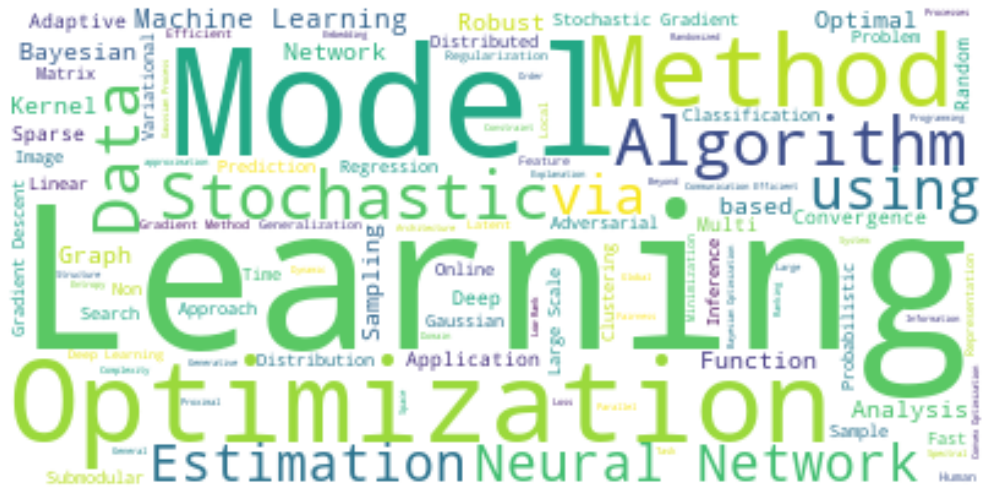

In [36]:
#Drow computer vision wordcloud
tolist=paper_title_ML.title.tolist()
#type(df)
str1 = '  '.join(str(e) for e in tolist)

# Start with one review:
text = str1

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=1000, max_words=600, background_color="white").generate(text)
plt.figure(figsize=[18,9])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
paper_title_AI = papers_data[papers_data['abstract'].str.contains('artificial intelligence')]
paper_title_AI

,source_id,year,title,abstract,full_text
3152,664,2007,The Noisy-Logical Distribution Application Cau...,We describe a novel noisy-logical distribution...,The Noisy-Logical Distribution and its Applica...
4638,1250,2012,"Burn-in, bias, rationality anchoring",Bayesian inference provides a unifying framewo...,Emergence of Object-Selective Features inUnsup...
5161,1260,2013,Adaptive Submodular Maximization Bandit Setting,Maximization of submodular functions has wide ...,Adaptive Submodular Maximization in Bandit Set...
5442,291,2014,A State-Space Model Decoding Auditory Attentio...,Humans are able to segregate auditory objects ...,A State-Space Model for Decoding AuditoryAtten...
5651,96,2015,Inferring Algorithmic Patterns Stack-Augmented...,Despite the recent achievements in machine lea...,Inferring Algorithmic Patterns withStack-Augme...
6113,2244,2016,"Interaction Networks Learning Objects, Relatio...","Reasoning about objects, relations, and physic...",Interaction Networks for Learning about Object...
6362,678,2016,Adaptive Maximization Pointwise Submodular Fun...,We study the worst-case adaptive optimization ...,Adaptive Maximization of Pointwise SubmodularF...
6606,1715,2017,Continual Learning Deep Generative Replay,Attempts to train a comprehensive artificial i...,Continual Learning with Deep Generative Replay...
7243,610,2018,Synthesized Policies Transfer Adaptation acros...,The ability to transfer in reinforcement learn...,Synthesized Policies for Transfer and Adaptati...
7278,1289,2018,Answerer Questioner's Mind: Information Theore...,Goal-oriented dialog has been given attention ...,Answerer in Questioner’s Mind:Information Theo...


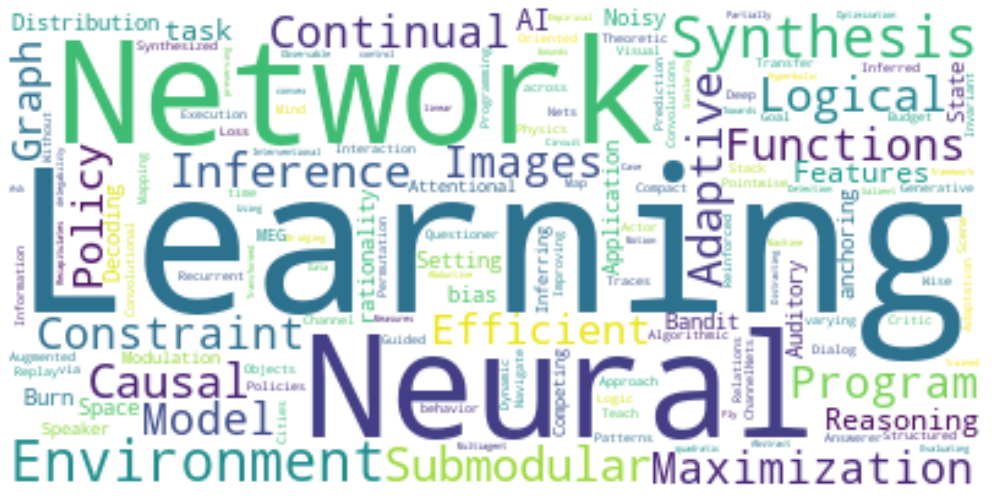

In [38]:
#Drow computer vision wordcloud
tolist=paper_title_AI.title.tolist()
#type(df)
str1 = '  '.join(str(e) for e in tolist)

# Start with one review:
text = str1

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=1000, max_words=600, background_color="white").generate(text)
plt.figure(figsize=[18,9])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
#print('scipy: {}'.format(scipy.__version__)) # the package will useing in machine learning 